# Working with data in Python (Exercises with solutions)

## Exercise 1

The marketing team at the financial services company that offers the 
credit card would like to better understand their clients in order 
to identify high value existing and potential customers to send 
offers to. Using descriptive statistics, investigate

(a) Do gender or ethinicity seem related to the number of cards that 
a customer owns?

(b) Which variables have the highest correlation with monthly credit 
card balance? Are there any other interesting correlations in the data?

The cell below starts the exercise.

In [5]:
import pandas as pd
data_ex1 = pd.read_csv('credit.csv')
data_ex1.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,-82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [6]:
## fix errors in the data
data_ex1.iloc[1, 5] = 82
data_ex1.iloc[0, 7] = "Male"
data_ex1.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


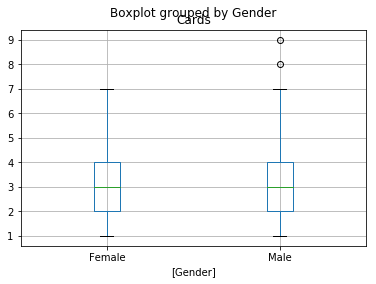

In [7]:
import matplotlib.pyplot as plt
df1 = data_ex1[["Cards", "Gender"]]
boxplot1 = df1.boxplot(by = "Gender")

# save graphic, see https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html
plt.savefig('fig1')      ## save as fig1.png 
plt.savefig('fig1.pdf', format='pdf', dpi=1000)   ## save as fig1.pdf 

# Show graphic
plt.show()

In [8]:
# close graphic
plt.close()

<font color='red'>It seems like that the variable gender is not related to the number 
of cards that a customer owns.</font>  

You can also change the settings for the boxplot.

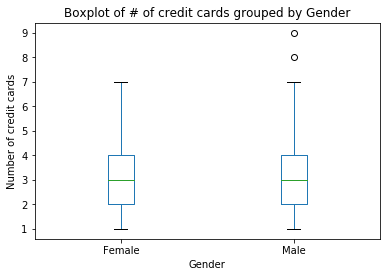

In [9]:
boxplot2 = df1.boxplot(by = "Gender", grid = False)
plt.title("Boxplot of # of credit cards grouped by Gender") ##  set your own proper title
plt.suptitle("")   ##  get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.xlabel('Gender')   ## Re-name x-axis
plt.ylabel('Number of credit cards')  ## Re-name y-axis
plt.savefig('fig2')    ## save as fig2.png 
plt.show()             # Show graphic
plt.close()            # Close graphic

<font color='red'>Now, let us look at the boxplot grouped by the variable Ethnicity.</font> 

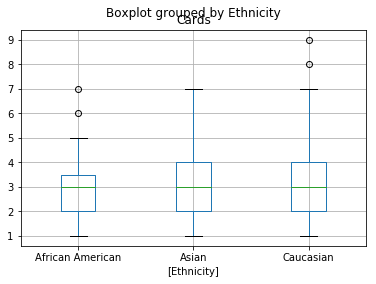

In [10]:
df2 = data_ex1[["Cards", "Ethnicity"]]
boxplot3 = df2.boxplot(by = "Ethnicity")

plt.savefig('fig3')      
plt.show()
plt.close()

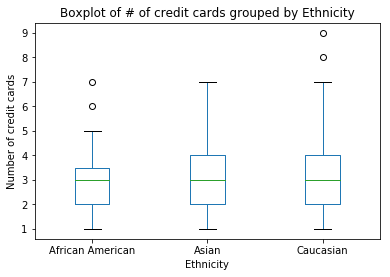

In [11]:
boxplot4 = df2.boxplot(by = "Ethnicity", grid = False)
plt.title("Boxplot of # of credit cards grouped by Ethnicity")      
plt.suptitle("")   
plt.xlabel('Ethnicity')   
plt.ylabel('Number of credit cards')  
plt.savefig('fig4')      
plt.show()
plt.close()

<font color='red'>The variable Ethnicity is also not related to the number of cards that 
a customer owns.</font> 

In [12]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html
ncol = data_ex1.shape[1]           ## number of columns

df3 = data_ex1.iloc[:, 1:ncol]     ## create a new data frame without observation ID
df3.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


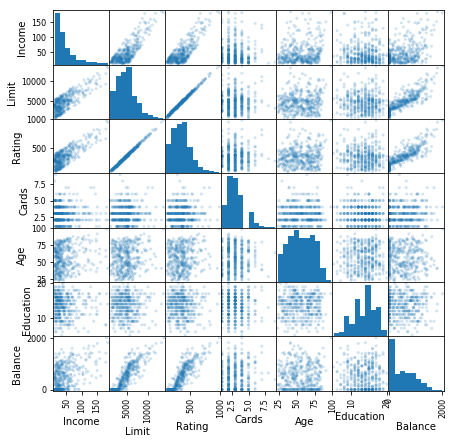

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(df3, alpha=0.2, figsize=(7, 7))
plt.savefig("fig5.png", dpi=1000)

In [14]:
df4 = df3.sort_index(axis=1)   ## Re-ordering columns in pandas dataframe based on column name
df4.head()

,Age,Balance,Cards,Education,Ethnicity,Gender,Income,Limit,Married,Rating,Student
0,34,333,2,11,Caucasian,Male,14.891,3606,Yes,283,No
1,82,903,3,15,Asian,Female,106.025,6645,Yes,483,Yes
2,71,580,4,11,Asian,Male,104.593,7075,No,514,No
3,36,964,3,11,Asian,Female,148.924,9504,No,681,No
4,68,331,2,16,Caucasian,Male,55.882,4897,Yes,357,No


In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [16]:
df5 = data_ex1[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance']]
df5.head()
corr_matrix = df5.corr()
nrow = corr_matrix.shape[0]
print(corr_matrix)
highest_corr = max(abs(corr_matrix.loc['Balance'][0: (nrow-1)]))

             Income     Limit    Rating     Cards       Age  Education  \
Income     1.000000  0.792088  0.791378 -0.018273  0.175338  -0.027692   
Limit      0.792088  1.000000  0.996880  0.010231  0.100888  -0.023549   
Rating     0.791378  0.996880  1.000000  0.053239  0.103165  -0.030136   
Cards     -0.018273  0.010231  0.053239  1.000000  0.042948  -0.051084   
Age        0.175338  0.100888  0.103165  0.042948  1.000000   0.003619   
Education -0.027692 -0.023549 -0.030136 -0.051084  0.003619   1.000000   
Balance    0.463656  0.861697  0.863625  0.086456  0.001835  -0.008062   

            Balance  
Income     0.463656  
Limit      0.861697  
Rating     0.863625  
Cards      0.086456  
Age        0.001835  
Education -0.008062  
Balance    1.000000  


<font color='red'>The variable **Rating** has the highest correlation of 0.863625 with 
monthly credit card balance. 

The variable **Education** has nagtive correlation with monthly credit card balance. It 
also has nagtive correlation with the variable income.</font> 

## Exercise 2

The population.xlsx file (downloadable from the course website) contains World Bank data on 
the total population of countries and regions in 1960 and 2015.

(a) Use the appropriate pandas function to import the data and specify the country name as 
    the index label (the column name is 'Country' in the original file).
    
(b) Display the first five rows.

(c) Display the data for Australia, China, and New Zealand only.

(d) Display the population size for all countries with population higher than 100 million 
    in 2015.

(e) Add one new column in the data frame to report the population growth 
    from 1960 to 2015 for all countries using the following formula:
       population growth = (the population size in 2015)/(the population size in 1960)-1
    
(f) Create a new dataframe, large_population, which contains a copy of the data selected 
    in (e). Save it as an Excel file. Open it in Excel, do some basic formatting, and 
    transfer the final table to Word as you may do when writing a report.
    
The cell below starts the exercise.

In [17]:
import pandas as pd
data_ex2 = pd.read_excel('population.xlsx')    ## you may need to install python package xlrd
data_ex2.head()

,Country,Country Code,Pop1960,Pop2015
0,Andorra,AND,13414.0,70473.0
1,Afghanistan,AFG,8994793.0,32526562.0
2,Angola,AGO,5270844.0,25021974.0
3,Albania,ALB,1608800.0,2889167.0
4,United Arab Emirates,ARE,92612.0,9156963.0


<font color='red'>Note that the rows of our data frame data_ex2 have a numerical index starting from 0, which is the default behaviour. 
However, we are required to use the column name 'Country' in the original file as the index label. We can do this in 
two different ways.</font>

In [18]:
## first method 
data_ex2.set_index('Country', inplace=True)
data_ex2.head()

,Country Code,Pop1960,Pop2015
Country,,,
Andorra,AND,13414.0,70473.0
Afghanistan,AFG,8994793.0,32526562.0
Angola,AGO,5270844.0,25021974.0
Albania,ALB,1608800.0,2889167.0
United Arab Emirates,ARE,92612.0,9156963.0


<font color='red'>Alternatively, we could specify the index label when reading the 
data into python.</font>

In [19]:
## Second method
import pandas as pd

## you may need to install python package xlrd to run the following command
data_ex2_v2 = pd.read_excel('population.xlsx', index_col='Country')    
data_ex2_v2.head(4)

,Country Code,Pop1960,Pop2015
Country,,,
Andorra,AND,13414.0,70473.0
Afghanistan,AFG,8994793.0,32526562.0
Angola,AGO,5270844.0,25021974.0
Albania,ALB,1608800.0,2889167.0


**(b) Display the first five rows.**

In [20]:
data_ex2.head()

,Country Code,Pop1960,Pop2015
Country,,,
Andorra,AND,13414.0,70473.0
Afghanistan,AFG,8994793.0,32526562.0
Angola,AGO,5270844.0,25021974.0
Albania,ALB,1608800.0,2889167.0
United Arab Emirates,ARE,92612.0,9156963.0


In [21]:
data_ex2_v2.head()

,Country Code,Pop1960,Pop2015
Country,,,
Andorra,AND,13414.0,70473.0
Afghanistan,AFG,8994793.0,32526562.0
Angola,AGO,5270844.0,25021974.0
Albania,ALB,1608800.0,2889167.0
United Arab Emirates,ARE,92612.0,9156963.0


**(c) Display the data for Australia, China, and New Zealand only.**

In [22]:
data_ex2.loc[['Australia', 'China', 'New Zealand'], :]

,Country Code,Pop1960,Pop2015
Country,,,
Australia,AUS,10276477.0,2.378117e+07
China,CHN,667070000.0,1.371220e+09
New Zealand,NZL,2371800.0,4.595700e+06


<font color='red'>Alternatively,</font>

In [23]:
row_labels = ['Australia','China','New Zealand']
data_ex2.loc[row_labels,:]

,Country Code,Pop1960,Pop2015
Country,,,
Australia,AUS,10276477.0,2.378117e+07
China,CHN,667070000.0,1.371220e+09
New Zealand,NZL,2371800.0,4.595700e+06


**(d) Add one new column "Growth" in the data frame to report the population growth rate 
    from 1960 to 2015 for all countries using the following formula:
    population growth rate= 100*((the population size in 2015)/(the population size in 1960)-1)**

In [24]:
data_ex2['Growth'] = 100*(data_ex2['Pop2015']/data_ex2['Pop1960']-1)
data_ex2.head()

,Country Code,Pop1960,Pop2015,Growth
Country,,,,
Andorra,AND,13414.0,70473.0,425.369017
Afghanistan,AFG,8994793.0,32526562.0,261.615459
Angola,AGO,5270844.0,25021974.0,374.724238
Albania,ALB,1608800.0,2889167.0,79.585219
United Arab Emirates,ARE,92612.0,9156963.0,9787.447631


**(e) Display the population sizes and growth rates for all countries with population 
      higher than 100 million in 2015.**

In [25]:
data_ex2.loc[data_ex2['Pop2015']>(10**8), ['Pop2015', 'Growth']]  ## 10**8 is 100 million

,Pop2015,Growth
Country,,
Bangladesh,1.609956e+08,234.010990
Brazil,2.078475e+08,186.711615
China,1.371220e+09,105.558637
Indonesia,2.575638e+08,193.377885
India,1.311051e+09,191.563640
Japan,1.269585e+08,37.251553
Mexico,1.270172e+08,232.731295
Nigeria,1.822020e+08,302.998137
Pakistan,1.889249e+08,320.657448


**(f) Create a new dataframe, large_population, which contains a copy of the data selected 
    in (e). Save it as an Excel file. Open it in Excel, do some basic formatting, and 
    transfer the final table to Word as you may do when writing a report.**

In [26]:
large_population = data_ex2.loc[data_ex2['Pop2015']>(10**8), ['Pop2015', 'Growth']] 
large_population.head()

large_population.to_excel('large_population.xlsx')